In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from analyze_session_stats import analyze_session_stats

datasets = [
    'Resampled/BTCUSD_30m.csv',
    'Resampled/BTCUSD_1h.csv',
    'Resampled/BTCUSD_1d.csv'
]

titles = [
    '30-Minute',
    '1-Hour',
    '1-Day'
]

output_folder = 'Crypto-analysis/AnalysisResults'

# Analyze all
for i in range(len(datasets)):
    analyze_session_stats(datasets[i], titles[i], output_folder)



=== Session Movement and Volatility Stats (30-Minute) ===
                            range               ATR_14                 return  \
                             mean      max        mean          max      mean   
session                                                                         
Asia                   267.224686  7083.76  284.786632  2285.768571  1.696008   
Asia + London Overlap  227.476917  5484.10  260.315002  1809.335000 -3.657916   
London                 210.086837  8275.86  235.925434  1840.324286  1.689209   
London + NY Overlap    229.163504  4591.43  218.341540  1795.720000  3.074727   
New York               292.829629  6587.35  236.997191  2187.215000  1.308528   
Other                  300.402494  5306.71  296.749285  3014.570714  0.423920   

                                   abs_return             efficiency  
                              std        mean         std       mean  
session                                                              

In [2]:
%load_ext autoreload
%autoreload 2


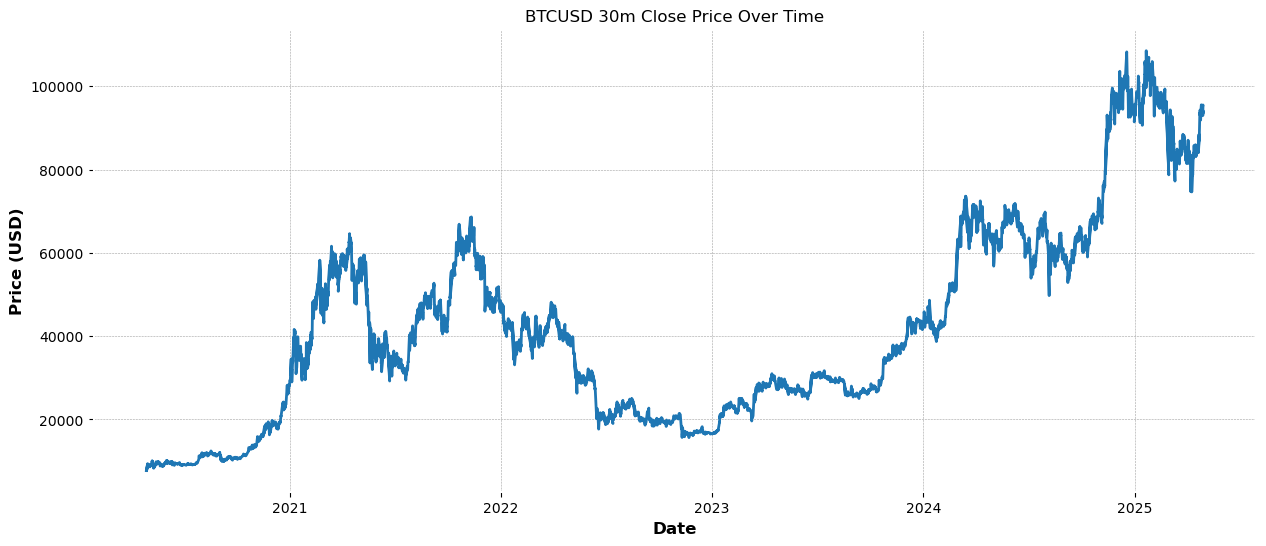

In [27]:
# Load your dataset
df = pd.read_csv('./Resampled/BTCUSD_30m.csv', index_col=0, parse_dates=True)

# Line chart
plt.figure(figsize=(15,6))
plt.plot(df.index, df['close'])
plt.title('BTCUSD 30m Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


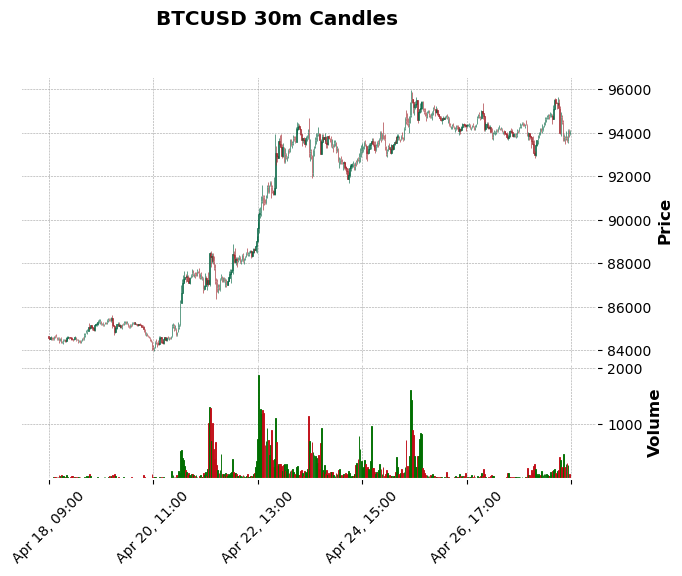

In [28]:
import mplfinance as mpf

# Load your dataset
df = pd.read_csv('./Resampled/BTCUSD_30m.csv', index_col=0, parse_dates=True)

# For mplfinance, dataframe must have columns: Open, High, Low, Close (capitalized)
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Plot candlestick chart
mpf.plot(df[-500:], type='candle', style='charles', title='BTCUSD 30m Candles', volume=True)


In [45]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


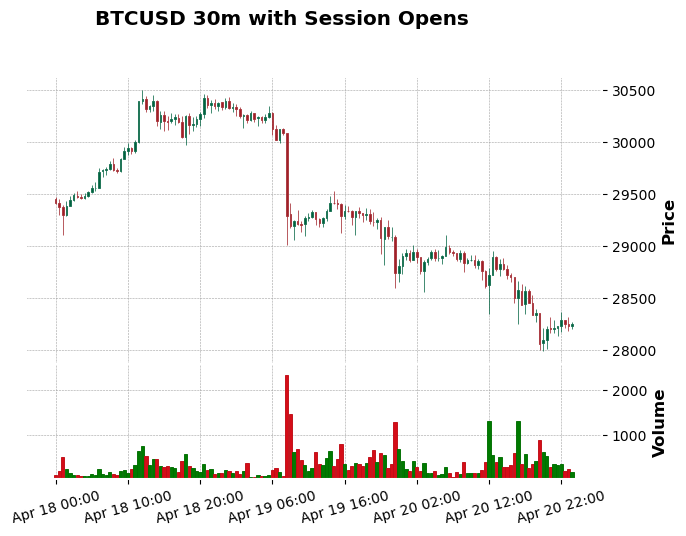

In [36]:
plot_candles(df, '2023-04-18 00:00', '2023-04-20 23:59', title="BTCUSD 30m with Session Opens")



=== Combined Session Movement and Volatility Stats ===
                        range_mean  range_max  ATR_14_mean   ATR_14_max  \
session                                                                   
Asia                    232.659434    8275.86   254.526839  1840.324286   
Asia + London Overlap   216.729907    2418.55   224.594006  1576.157857   
London                  237.794038    6587.35   220.578151  1917.249286   
London + NY Overlap     334.919418    5764.05   250.061313  2187.215000   
New York                300.402494    5306.71   296.749285  3014.570714   
Other                   263.320979    7083.76   291.696949  2285.768571   
Asia                    334.240223    8275.86   394.689749  3550.540000   
Asia + London Overlap   313.647185    3235.56   354.631348  2163.305714   
London                  341.435623    7442.23   340.669253  2291.030000   
London + NY Overlap     486.927490    7394.21   347.338429  2529.571429   
New York                430.333580    6783.3

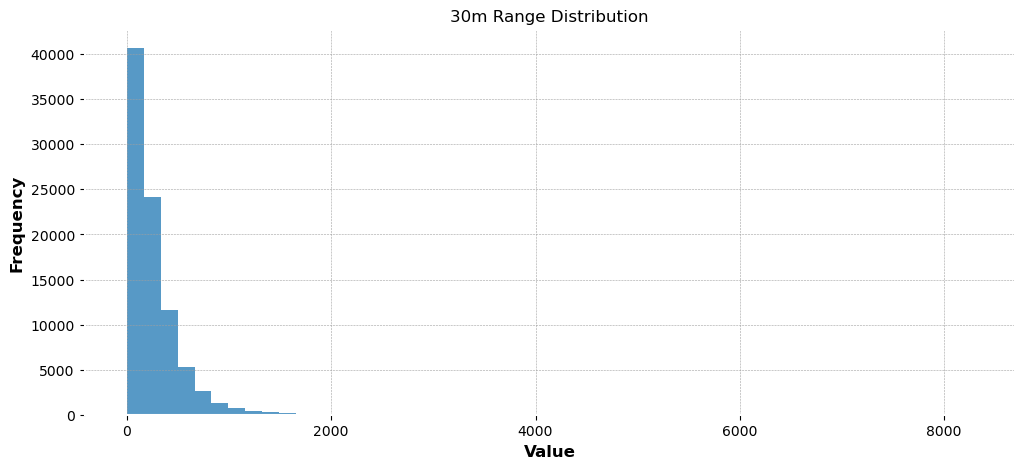

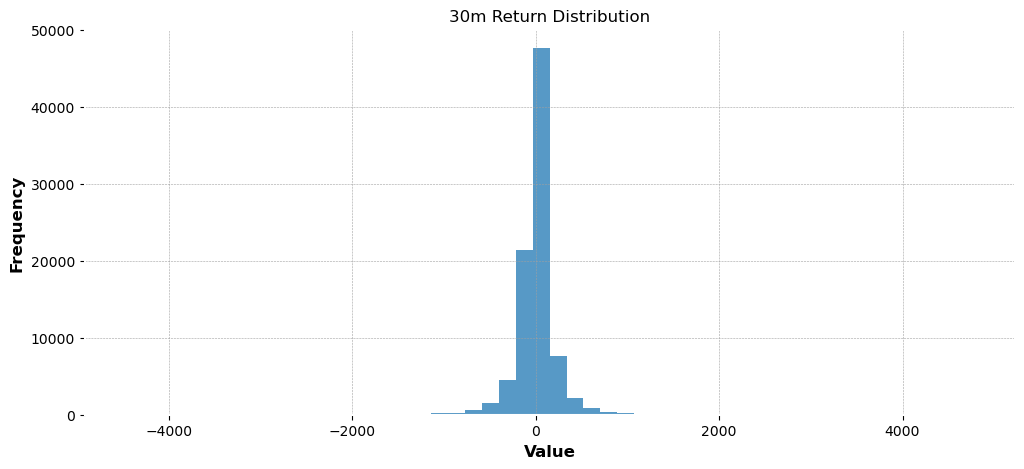

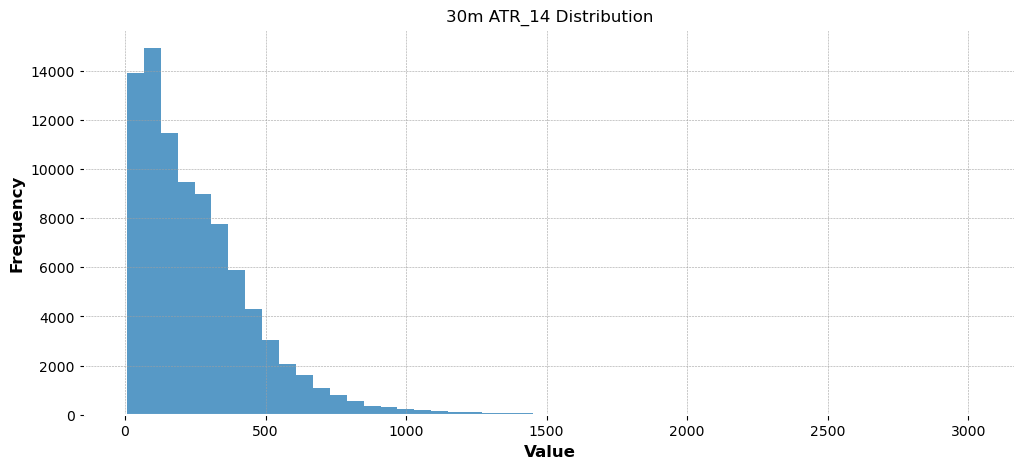

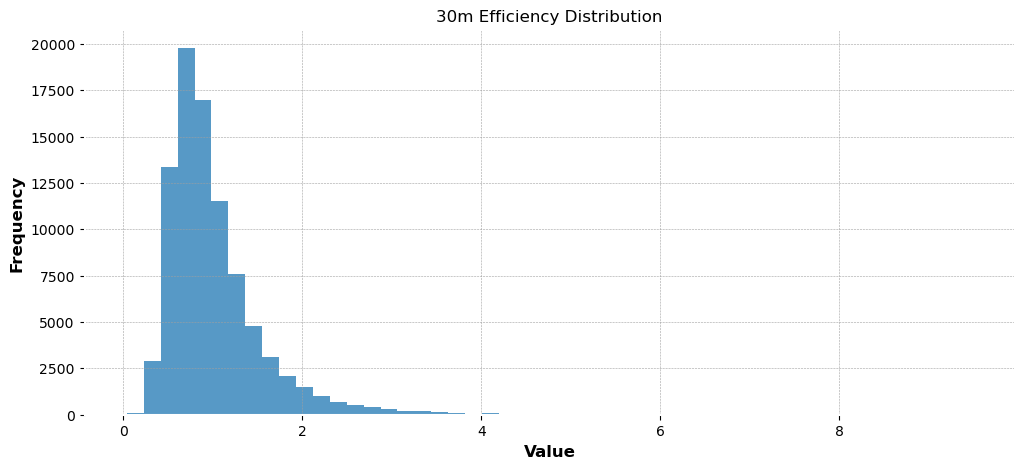

In [50]:
# main_runner.ipynb
import sys
sys.path.append('./')

# --- Setup Imports ---
import pandas as pd
from modules.timeframe_processor import process_timeframe
from visualization.plot_distributions import plot_distribution

# --- Process Each Timeframe ---
# Process all timeframes
df_30m, stats_30m = process_timeframe('./Resampled/BTCUSD_30m.csv', '30m')
df_1h, stats_1h = process_timeframe('./Resampled/BTCUSD_1h.csv', '1h')
df_1d, stats_1d = process_timeframe('./Resampled/BTCUSD_1d.csv', '1d')

# Combine all stats
all_stats = pd.concat([stats_30m, stats_1h, stats_1d])
all_stats.to_csv('./AnalysisResults/session_metrics_all_timeframes.csv')


# --- View Results ---
print("\n=== Combined Session Movement and Volatility Stats ===")
print(all_stats)

# --- Save Results ---
all_stats.to_csv('./AnalysisResults/session_metrics_all_timeframes.csv')
print("✅ Combined session stats saved to ./AnalysisResults/session_metrics_all_timeframes.csv")

# --- Plot Distributions (Optional) ---
# You can now plot for any df easily!
plot_distribution(df_30m['range'], '30m Range Distribution')
plot_distribution(df_30m['return'], '30m Return Distribution')
plot_distribution(df_30m['ATR_14'], '30m ATR_14 Distribution')
plot_distribution(df_30m['efficiency'], '30m Efficiency Distribution')

# Same thing can be done for 1h, 1d if needed


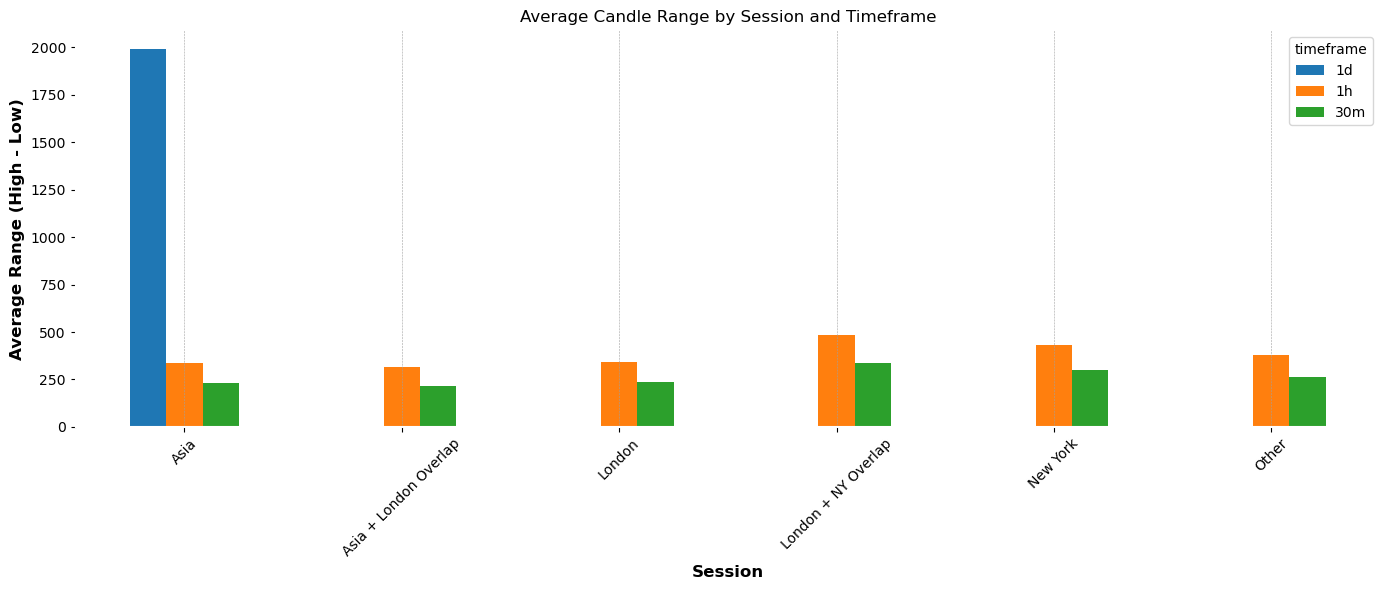

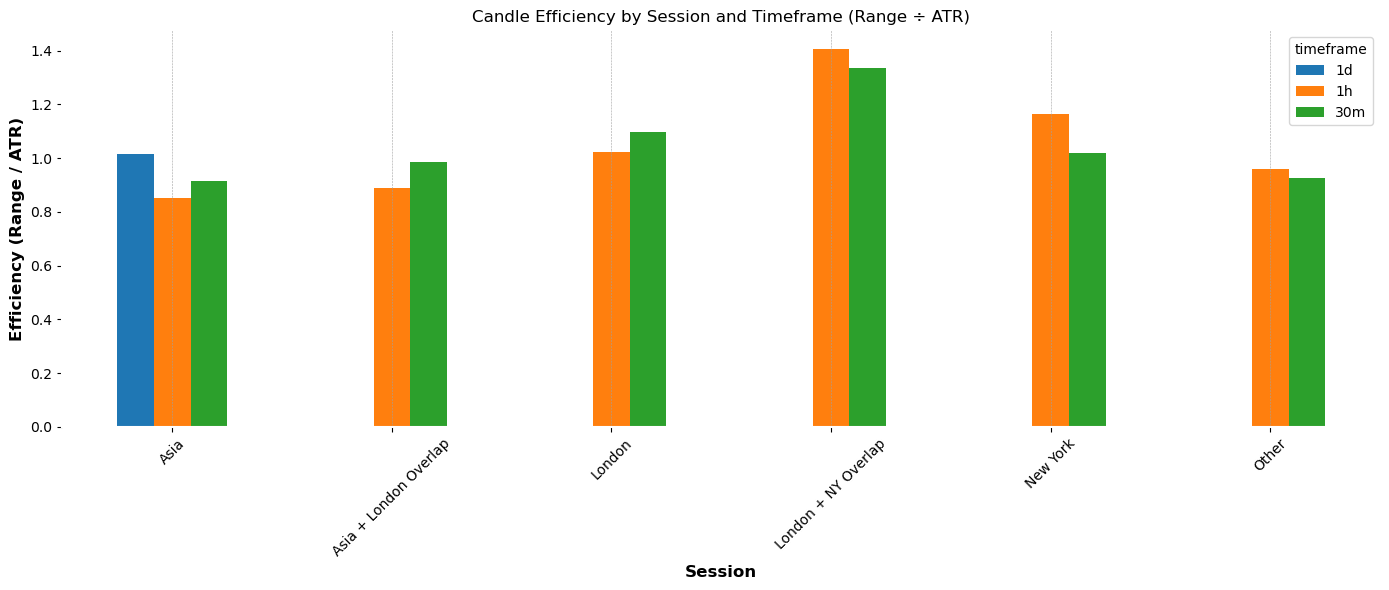

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the correct session metrics file
df = pd.read_csv('./AnalysisResults/session_metrics_all_timeframes.csv')  # ✅ Correct path

# Reset index and clean
df = df.reset_index(drop=True)
df = df.dropna(subset=['range_mean', 'efficiency_mean', 'timeframe', 'session'])

# --- Plot 1: Average Range ---
pivot_range = df.pivot(index='session', columns='timeframe', values='range_mean')
pivot_range.plot(kind='bar', figsize=(14, 6), title='Average Candle Range by Session and Timeframe')
plt.ylabel('Average Range (High - Low)')
plt.xlabel('Session')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# --- Plot 2: Range Efficiency ---
pivot_eff = df.pivot(index='session', columns='timeframe', values='efficiency_mean')
pivot_eff.plot(kind='bar', figsize=(14, 6), title='Candle Efficiency by Session and Timeframe (Range ÷ ATR)')
plt.ylabel('Efficiency (Range / ATR)')
plt.xlabel('Session')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [54]:
from modules.session_aggregator import build_session_ohlc
df_30m.columns = [col.lower() for col in df_30m.columns]

# --- Build session-level candles from 30m data ---
session_df = build_session_ohlc(df_30m, timeframe='30m')
session_df.to_csv('./AnalysisResults/session_candles_from_30m.csv', index=False)
print("✅ Session-level candles saved to ./AnalysisResults/session_candles_from_30m.csv")


✅ Session-level candles saved to ./AnalysisResults/session_candles_from_30m.csv


In [53]:
print(df_30m.columns.tolist())


['Open', 'High', 'Low', 'Close', 'Volume', 'session', 'range', 'return', 'abs_return', 'prior_close', 'tr1', 'tr2', 'tr3', 'true_range', 'ATR_14', 'efficiency']


In [60]:
import pandas as pd

# --- Load session-level candles ---
session_df = pd.read_csv('./AnalysisResults/session_candles_from_30m.csv')

# --- Basic cleaning ---
session_df.dropna(subset=['range'], inplace=True)

# --- Calculate session-level Absolute Return ---
session_df['abs_return'] = session_df['return'].abs()

# --- Calculate True Range for ATR calculation ---
session_df['prior_close'] = session_df['close'].shift(1)
session_df['tr1'] = session_df['high'] - session_df['low']
session_df['tr2'] = (session_df['high'] - session_df['prior_close']).abs()
session_df['tr3'] = (session_df['low'] - session_df['prior_close']).abs()
session_df['true_range'] = session_df[['tr1', 'tr2', 'tr3']].max(axis=1)

# --- Calculate ATR (over 14 sessions) ---
session_df['ATR_14'] = session_df['true_range'].rolling(window=14).mean()

# --- ✅ Correct Efficiency Calculation ---
session_df['efficiency'] = session_df['range'] / session_df['ATR_14']

# --- Final Cleaning ---
session_df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
session_df.dropna(inplace=True)

# --- Group by session ---
session_stats = session_df.groupby('session').agg({
    'range': ['mean', 'max'],
    'ATR_14': ['mean', 'max'],
    'return': ['mean', 'std'],
    'abs_return': ['mean', 'std'],
    'efficiency': 'mean'
}).round(2)

# --- Print the results ---
print("=== Corrected Session-Level Daily Stats ===")
print(session_stats)

# --- (Optional) Save if you want ---
session_stats.to_csv('./AnalysisResults/session_level_daily_stats.csv')


=== Corrected Session-Level Daily Stats ===
            range            ATR_14          return         abs_return  \
             mean       max    mean      max   mean     std       mean   
session                                                                  
Asia       936.34  11543.09  935.85  4700.36  -4.34  751.41     426.91   
London     842.75   9083.67  940.53  4834.28  27.09  657.89     386.02   
New York  1246.79  12990.00  962.86  4595.81   4.15  998.46     593.70   
Other      774.10   7522.11  957.92  4622.41  20.16  588.45     350.87   

                 efficiency  
             std       mean  
session                      
Asia      618.29       1.01  
London    533.34       0.91  
New York  802.67       1.31  
Other     472.76       0.83  


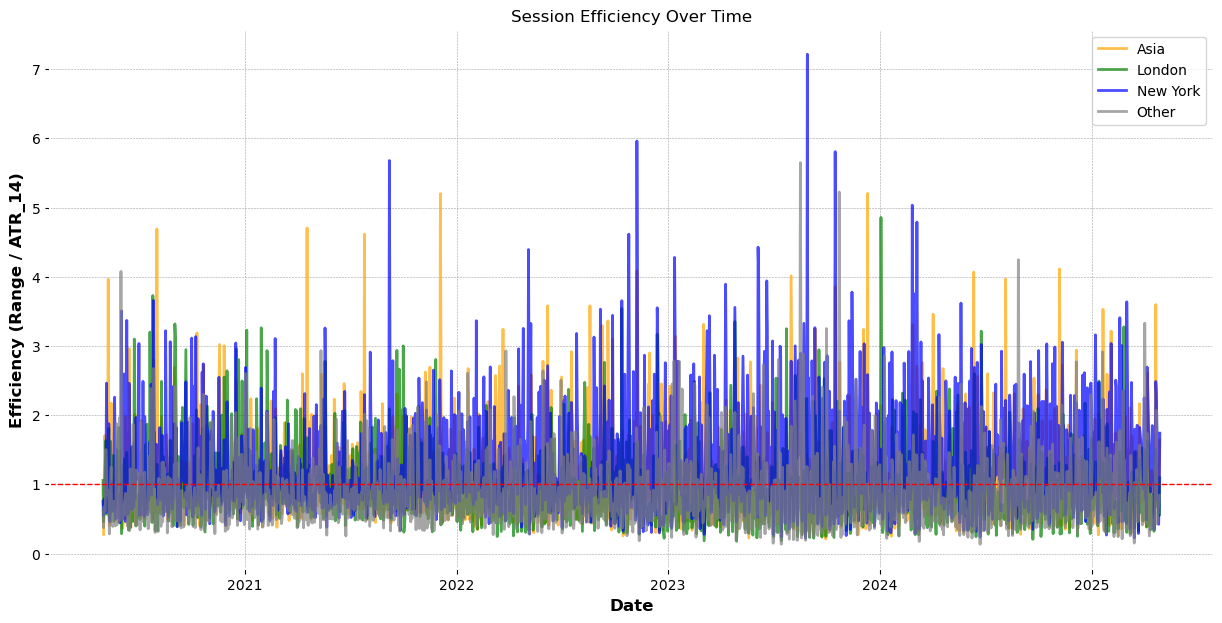

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Load session-level candles
session_df = pd.read_csv('./AnalysisResults/session_candles_from_30m.csv')

# --- Basic cleaning ---
session_df.dropna(subset=['range'], inplace=True)

# --- Calculate needed metrics ---
session_df['prior_close'] = session_df['close'].shift(1)
session_df['tr1'] = session_df['high'] - session_df['low']
session_df['tr2'] = (session_df['high'] - session_df['prior_close']).abs()
session_df['tr3'] = (session_df['low'] - session_df['prior_close']).abs()
session_df['true_range'] = session_df[['tr1', 'tr2', 'tr3']].max(axis=1)
session_df['ATR_14'] = session_df['true_range'].rolling(window=14).mean()

# ✅ Correct Efficiency Definition
session_df['efficiency'] = session_df['range'] / session_df['ATR_14']

# Drop garbage
session_df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
session_df.dropna(inplace=True)

# --- Prepare Data for Plotting ---
session_df['timestamp'] = pd.to_datetime(session_df['timestamp'])
session_df.set_index('timestamp', inplace=True)

# --- Plotting ---
plt.figure(figsize=(15,7))

# Plot efficiency separately for each session
sessions = ['Asia', 'London', 'New York', 'Other']
colors = {'Asia': 'orange', 'London': 'green', 'New York': 'blue', 'Other': 'gray'}

for session in sessions:
    session_data = session_df[session_df['session'] == session]
    plt.plot(session_data.index, session_data['efficiency'], label=session, color=colors[session], alpha=0.7)

# Add horizontal line at efficiency = 1.0
plt.axhline(1.0, color='red', linestyle='--', linewidth=1)

plt.title('Session Efficiency Over Time')
plt.xlabel('Date')
plt.ylabel('Efficiency (Range / ATR_14)')
plt.legend()
plt.grid(True)
plt.show()


In [68]:
label_and_save_sessions('./Resampled/BTCUSD_1h.csv', 'BTCUSD_1h', timestamp_col='time')
label_and_save_sessions('./Resampled/BTCUSD_1d.csv', 'BTCUSD_1d', timestamp_col='time')
label_and_save_sessions('./Resampled/BTCUSD_30m.csv', 'BTCUSD_30m', timestamp_col='time')

('./Resampled/raw/BTCUSD_30m_labeled.csv',
 './Resampled/additional_features/BTCUSD_30m_features.csv')

In [74]:
from modules.timestamp_features import add_timestamp_features
from modules.volatility_features import add_volatility_features


# --- 30m ---
df_30m = pd.read_csv('./Resampled/Additional_Features/BTCUSD_30m_features.csv', parse_dates=['time'], index_col='time')
df_30m = add_timestamp_features(df_30m)
df_30m = add_volatility_features(df_30m)
df_30m.to_csv('./Resampled/Additional_Features/BTCUSD_30m_features.csv')

# --- 1h ---
df_1h = pd.read_csv('./Resampled/Additional_Features/BTCUSD_1h_features.csv', parse_dates=['time'], index_col='time')
df_1h = add_timestamp_features(df_1h)
df_1h = add_volatility_features(df_1h)
df_1h.to_csv('./Resampled/Additional_Features/BTCUSD_1h_features.csv')

# --- 1d ---
df_1d = pd.read_csv('./Resampled/Additional_Features/BTCUSD_1d_features.csv', parse_dates=['time'], index_col='time')
df_1d = add_volatility_features(df_1d) 
df_1d.to_csv('./Resampled/Additional_Features/BTCUSD_1d_features.csv')


In [75]:

df = pd.read_csv('./Resampled/Additional_Features/BTCUSD_30m_features.csv')
print(df.columns)


Index(['time', 'open', 'high', 'low', 'close', 'volume', 'session',
       'abs_return', 'range', 'prior_close', 'tr1', 'tr2', 'tr3', 'true_range',
       'ATR_14', 'efficiency', 'range_change', 'efficiency_change',
       'volatility_spike', 'rolling_volatility_std'],
      dtype='object')


In [77]:
import pandas as pd
from modules.timestamp_features import add_timestamp_features
from modules.volatility_features import add_volatility_features
from modules.combined_features import (
    add_session_structure_features,
    add_candle_structure_features,
    add_trend_continuation_features,
    add_structure_zone_features,
    add_meta_composite_features
)

# === Load 30m data ===
df_30m = pd.read_csv('./Resampled/Additional_Features/BTCUSD_30m_features.csv', parse_dates=['time'], index_col='time')

# === Apply all feature layers ===
df_30m = add_timestamp_features(df_30m)
df_30m = add_volatility_features(df_30m)
df_30m = add_session_structure_features(df_30m)
df_30m = add_candle_structure_features(df_30m)
df_30m = add_trend_continuation_features(df_30m)
df_30m = add_structure_zone_features(df_30m)
df_30m = add_meta_composite_features(df_30m)

# === Save updated dataset ===
df_30m.to_csv('./Resampled/Additional_Features/BTCUSD_30m_features.csv')
print("✅ All features added and saved to BTCUSD_30m_features.csv")


✅ All features added and saved to BTCUSD_30m_features.csv


In [79]:
# === 1H Timeframe ===
df_1h = pd.read_csv('./Resampled/Additional_Features/BTCUSD_1h_features.csv', parse_dates=['time'], index_col='time')
df_1h = add_timestamp_features(df_1h)
df_1h = add_volatility_features(df_1h)
df_1h = add_session_structure_features(df_1h)
df_1h = add_candle_structure_features(df_1h)
df_1h = add_trend_continuation_features(df_1h)
df_1h = add_structure_zone_features(df_1h)
df_1h = add_meta_composite_features(df_1h)
df_1h.to_csv('./Resampled/Additional_Features/BTCUSD_1h_features.csv')
print("✅ 1h features saved.")

# === 1D Timeframe ===
df_1d = pd.read_csv('./Resampled/Additional_Features/BTCUSD_1d_features.csv', parse_dates=['time'], index_col='time')
# ⛔ Skip timestamp features — daily already represents 1 point per day
df_1d = add_volatility_features(df_1d)
df_1d = add_session_structure_features(df_1d)
df_1d = add_candle_structure_features(df_1d)
df_1d = add_trend_continuation_features(df_1d)
df_1d = add_structure_zone_features(df_1d)
df_1d = add_meta_composite_features(df_1d)
df_1d.to_csv('./Resampled/Additional_Features/BTCUSD_1d_features.csv')
print("✅ 1d features saved.")

✅ 1h features saved.
✅ 1d features saved.


In [80]:
print(df_30m.iloc[0])

open                               7789.77
high                               7794.74
low                                7736.12
close                               7739.2
volume                          434.900889
session                               Asia
abs_return                           50.57
range                                58.62
prior_close                            NaN
tr1                                  58.62
tr2                                    NaN
tr3                                    NaN
true_range                           58.62
ATR_14                                 NaN
efficiency                             NaN
range_change                           NaN
efficiency_change                      NaN
volatility_spike                     False
rolling_volatility_std                 NaN
date                            2020-04-28
time_of_day                       00:00:00
hour                                     0
minute                                   0
session_ste

In [81]:
df.iloc[[1, 14, 15, 25, 30, 40]]


,time,open,high,low,close,volume,session,abs_return,range,prior_close,tr1,tr2,tr3,true_range,ATR_14,efficiency,range_change,efficiency_change,volatility_spike,rolling_volatility_std
1,2020-04-28 00:30:00,7739.20,7757.31,7734.74,7755.57,193.980392,Asia,16.37,22.57,7739.20,22.57,18.11,4.46,22.57,NaN,NaN,0.385022,NaN,False,NaN
14,2020-04-28 07:00:00,7722.01,7722.01,7700.22,7705.17,90.753479,London,16.84,21.79,7722.01,21.79,0.00,21.79,21.79,27.463571,0.793415,1.750201,1.917851,False,12.480820
15,2020-04-28 07:30:00,7705.17,7720.13,7698.71,7712.46,74.765996,London,7.29,21.42,7705.17,21.42,14.96,6.46,21.42,27.381429,0.782282,0.983020,0.985969,False,12.477814
25,2020-04-28 12:30:00,7757.47,7775.00,7747.55,7768.05,285.801932,London,10.58,27.45,7757.46,27.45,17.54,9.91,27.45,26.457143,1.037527,0.845135,0.819352,False,7.521746
30,2020-04-28 15:00:00,7690.27,7737.18,7672.51,7732.04,513.584121,New York,41.77,64.67,7691.84,64.67,45.34,19.33,64.67,31.688571,2.040799,1.033397,0.936566,True,16.922368
40,2020-04-28 20:00:00,7725.91,7746.20,7714.44,7737.91,153.573430,Other,12.00,31.76,7726.59,31.76,19.61,12.15,31.76,29.003571,1.095038,1.619582,1.583285,False,8.238757
